<a href="https://colab.research.google.com/github/CaeltUNIFEI/Infografico/blob/main/analiseDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inicialização

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

dados = pd.read_csv('/content/drive/MyDrive/censoUNIFEI/dadosLimpos.csv', sep=',', encoding='utf-8')
pd.set_option('display.max_columns', 500)

# Contagem dos dados

In [ ]:
contagemIdade = dados['idade'].value_counts().sort_index()
contagemSexo = dados['sexo'].value_counts()
contagemOrientacao = dados['orientacaoSexual'].value_counts()
contagemEtnia = dados['etnia/cor'].value_counts()
contagemUF = dados['UF'].value_counts()
contagemTempoUnifei = dados['tempoNaUnifeiEmAnos'].value_counts().sort_index()
contagemEM = dados['EM'].value_counts()
contagemCategoriaIngresso = dados['categoriaIngresso'].value_counts()
contagemGrupoCota = dados['grupoCota'].value_counts()
contagemTrancouCurso = dados['trancouCurso'].value_counts()
contagemRepublica = dados['republica'].value_counts()
contagemServicosBasicos = dados['servicosBasicos'].value_counts()
contagemTrabalha = dados['trabalha'].value_counts()
contagemBeneficios = dados['beneficiosTrabalho'].value_counts()
contagemRendaMensal = dados['rendaMensal'].value_counts()
contagemContribuintes = dados['contribuintes'].value_counts().sort_index()
contagemDividas = dados['dividas/emprestimos'].value_counts()
contagemAuxilio = dados['recebeAuxilio'].value_counts()
#contagemQualAuxilio = dados1['qualAuxilio'].value_counts()
contagemPrecoRU = dados['precoRU'].value_counts()
contagemSuporteSocioeconomico = dados['suporteSocioeconomico'].value_counts()
contagemAssistenciaDAE = dados['assistenciaDAE'].value_counts()
contagemPossuiNecessidade = dados['possuiNecessidade'].value_counts()
contagemReligiao = dados['religiao'].value_counts()
#Justifique (socioeconomico)
#Especifique (qual necessidade)

# Graficos

In [ ]:

def plot_configurado(df, titulo="Gráfico", xlabel='', ylabel='', grid=True, cor='royalblue'):
  """
    Parâmetros:
        df: DataFrame do pandas
        x: Nome da coluna do eixo X
        y: Nome da coluna do eixo Y
        titulo: Título do gráfico (opcional)
        xlabel: Nome do eixo X (opcional)
        ylabel: Nome do eixo Y (opcional)
        grid: Se True, adiciona grades no gráfico
  """

  df.plot.bar(x=df.index, y=df.values, legend=False, figsize=(8, 5), color=cor, alpha=0.8);

  # Configurações gerais
  plt.title(titulo, fontsize=14, fontweight='bold')
  plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo X
  plt.yticks(range(0, df.values.max() + 1, 2))  # Ajusta os ticks do eixo Y
  plt.xlabel(xlabel, fontsize=12)
  plt.ylabel(ylabel, fontsize=12)

  if grid:
      plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)  # Grade apenas no eixo Y

  plt.savefig(f"/content/drive/MyDrive/censoUNIFEI/Graficos/{titulo}.svg", dpi=300, bbox_inches='tight', format='svg')
  plt.show();
  plt.close()

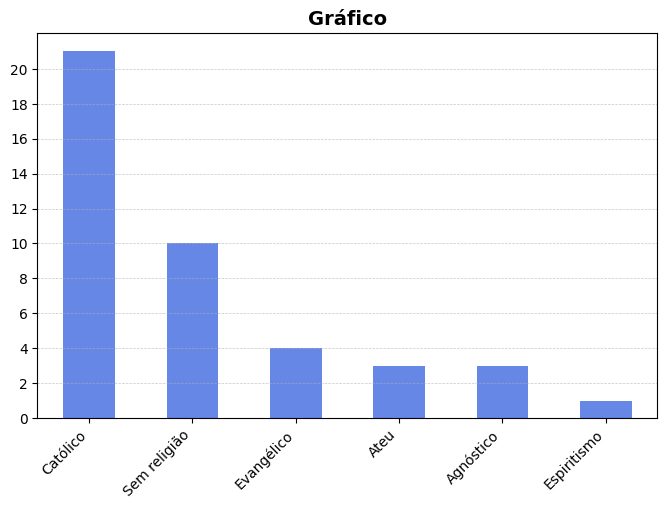

In [ ]:
plot_configurado(contagemReligiao)

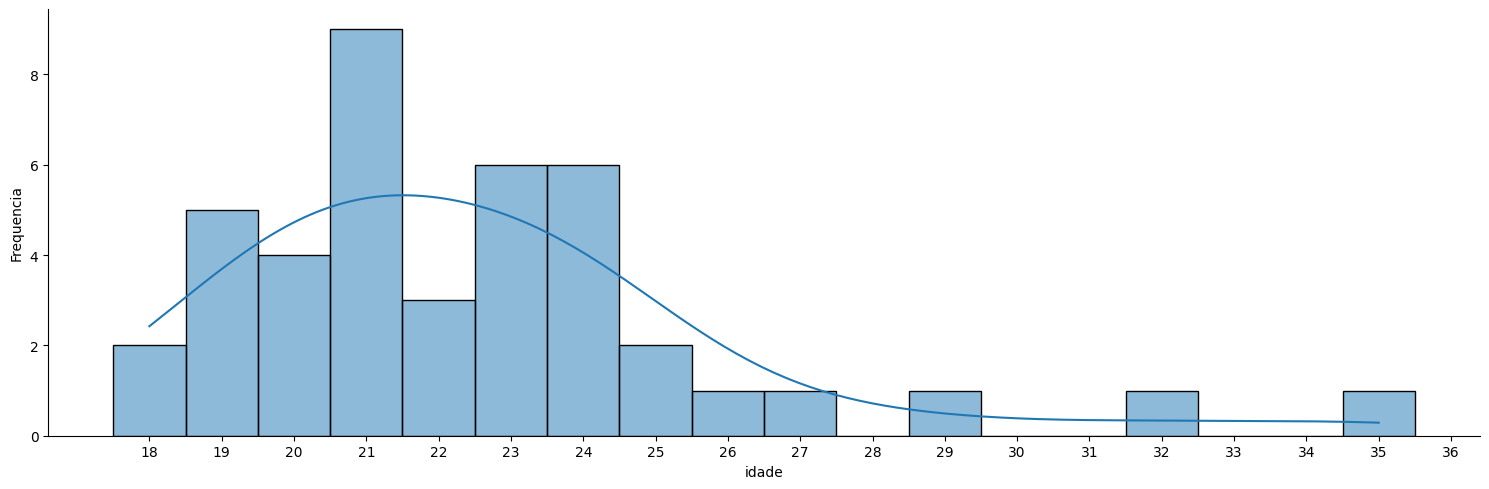

In [ ]:
df = contagemIdade.reset_index()
df.columns = ['idade', 'frequencia']

sns.displot(data=dados, binwidth=1, x='idade', kde=True, aspect=3, discrete=True)
plt.ylabel('Frequencia')
plt.xticks(range(min(dados['idade']), max(dados['idade']) + 2, 1))
plt.savefig("/content/drive/MyDrive/censoUNIFEI/Graficos/Gráfico idadeXfrequencia.svg", dpi=300, bbox_inches='tight', format='svg')
plt.show()
plt.close()


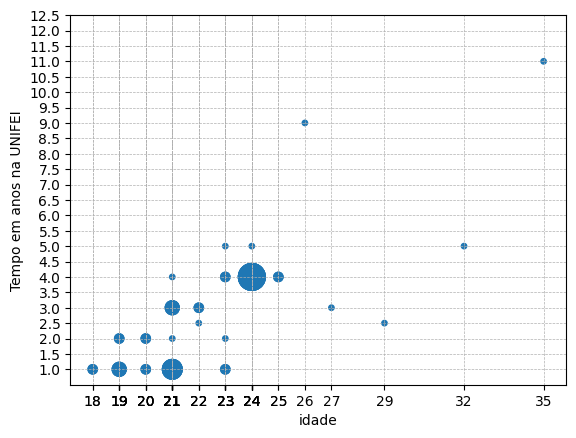

In [ ]:
#Frequencia = quantidade de grupos de pessoas com a mesma idade e mesmo tempo de unifei
#tamanho_pontos leva em consideração a variavel frequência para calcular o tamanho dos pontos
frequencia = dados.groupby(['idade', 'tempoNaUnifeiEmAnos']).size()
tamanho_pontos = dados.set_index(['idade', 'tempoNaUnifeiEmAnos']).index.map(frequencia) * (np.exp((dados.set_index(['idade', 'tempoNaUnifeiEmAnos']).index.map(frequencia))/2.5)) * 10

dados.plot.scatter(x='idade', y='tempoNaUnifeiEmAnos', s=tamanho_pontos)
plt.xticks(dados['idade']);
plt.yticks(np.arange(int(dados['tempoNaUnifeiEmAnos'].min()), int(dados['tempoNaUnifeiEmAnos'].max()) + 2, 0.5))
plt.ylabel('Tempo em anos na UNIFEI');
plt.grid(axis='both', linestyle='--', linewidth=0.5, alpha=1)
plt.savefig("/content/drive/MyDrive/censoUNIFEI/Graficos/Gráfico idadeXtempoNaUNIFEI.svg", dpi=300, bbox_inches='tight', format='svg')
plt.show()
plt.close()

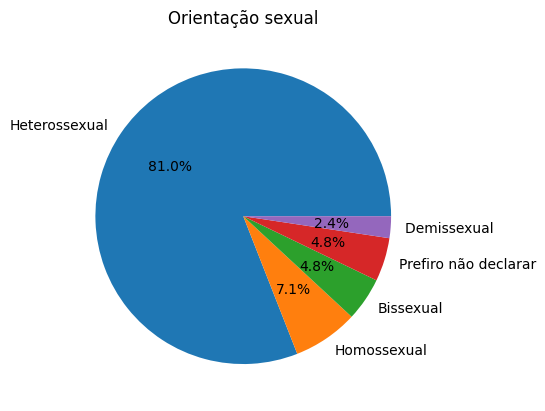

In [ ]:
contagemOrientacao.plot.pie(title="Orientação sexual", autopct='%1.1f%%', ylabel='')
plt.savefig("/content/drive/MyDrive/censoUNIFEI/Graficos/Gráfico orientacaoSexual(pizza).svg", dpi=300, bbox_inches='tight', format='svg')
plt.show()
plt.close()

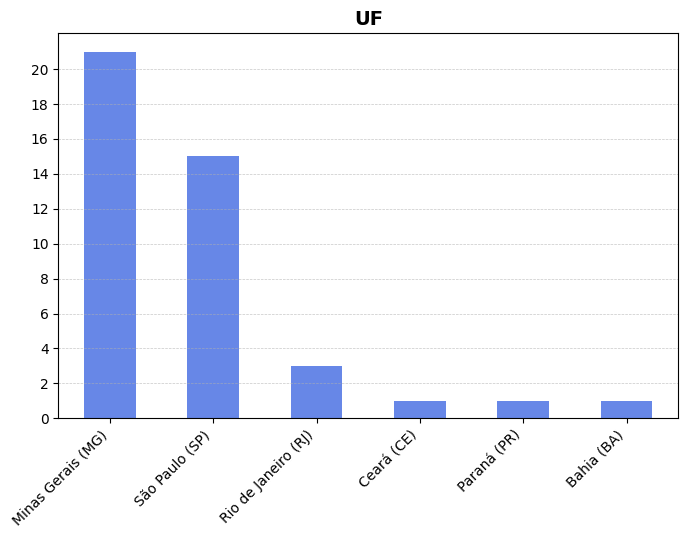

<Figure size 640x480 with 0 Axes>

In [ ]:
#contagemUF.plot.bar(title="Unidade Federativa: ", ylabel='Frequência')
#plt.yticks(range(0, contagemUF.max() + 1, 2))
plot_configurado(contagemUF, 'UF')
plt.savefig("/content/drive/MyDrive/censoUNIFEI/Graficos/Gráfico UF(bar).svg", dpi=300, bbox_inches='tight', format='svg')